
(Data Preprocessing)

1. Missing values
2. Handling Duplicates (it has to be done when genere must have unique values)
3. Type Casting
4. Zero variance
5. Discretizatation/binning/grouping
6. Outlier treatment
7. Dummy Variable creation
8. Normazlization


(Data Wrangling I)
1. df.isnull().sum()
2. df.describe()
3. df.shape
4. df.dftypes
5. typycasting
6. Drop unwanted column eg. df.drop('Province/State', axis=1, inplace=True)



In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns

In [3]:
df = pd.read_csv('covid_19_clean_complete_2022.csv')
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,213348.000000,213348.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05
mean,20.528131,22.735337,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05
std,25.899139,76.304185,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.426991,-27.932425,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,22.233350,21.752000,5.223000e+03,71.000000,4.500000e+01,1.243000e+03
75%,41.166070,88.658375,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


In [5]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

# 1. Missing Values

In [6]:
df.isnull().sum()

Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64

In [11]:
df.fillna("1") 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,1,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,1,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,1,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,1,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
214889,1,West Bank and Gaza,31.9522,35.2332,2022-03-04,649971,5557,0,644414,Eastern Mediterranean
214890,1,Winter Olympics 2022,39.9042,116.4074,2022-03-04,530,0,0,530,1
214891,1,Yemen,15.552727,48.516388,2022-03-04,11774,2135,0,9639,Eastern Mediterranean
214892,1,Zambia,-13.133897,27.849332,2022-03-04,313613,3958,0,309655,Africa


In [13]:
df['WHO Region'].fillna(df['WHO Region'].mode()[0], inplace = True) # for categorical data

In [14]:
 df.isnull().sum()

Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region             0
dtype: int64

# 2. Checking Duplicates

In [19]:
duplicate = df.duplicated()

In [20]:
sum(duplicate)

0

If Duplicates present,

df = df.drop_duplicates()

# 3. TypeCasting

In [21]:
df.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [28]:
df['Country/Region'] = df['Country/Region'].astype('string')

In [23]:
df['WHO Region'] = df['WHO Region'].astype('string')

In [29]:
df.dtypes

Country/Region    string[python]
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region        string[python]
dtype: object

# 4. Variance


In [36]:
df['Long'].var()

5822.328622080355

# 5. Binning

In [37]:
df['Lat_new'] = pd.cut(df['Lat'], 
                                  bins = [min(df.Lat), 
                                          df['Lat'].quantile(0.25), 
                                          df['Lat'].quantile(0.5), 
                                          df['Lat'].quantile(0.75), 
                                          max(df.Lat)], 
                                          labels=["Low", "Below Ave", "Above Ave", "High"])

In [38]:
df.Lat_new.value_counts()

Lat_new
Below Ave    53337
Above Ave    53337
High         53337
Low          52564
Name: count, dtype: int64

# 6. Outlier Treatment

<Axes: >

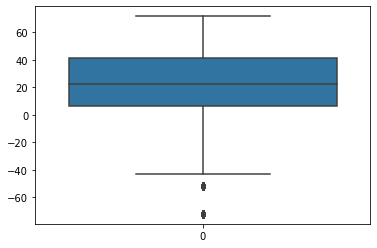

In [44]:
sns.boxplot(df.Lat)

<Axes: >

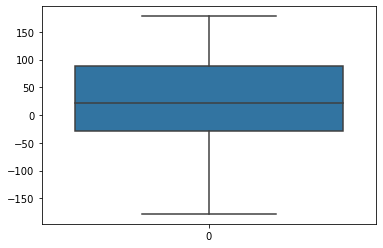

In [45]:
sns.boxplot(df.Long)

In [46]:
# Detection of outliers (find limits for salary based on IQR)

# IQR = Q3 - Q1

Q3 = df['Lat'].quantile(0.75)
Q1 = df['Lat'].quantile(0.25)

# IQR = Q3 - Q1
IQR = Q3 - Q1

# upper_limit = Q3 + (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)

#lower_limit = Q1 - (IQR * 1.5)
lower_limit = Q1 - (IQR * 1.5)




In [68]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,211802.000000,211802.000000,2.133480e+05,213348.000000,2.133480e+05,2.133480e+05
mean,21.129600,23.033319,4.611305e+05,9378.234003,1.087812e+05,3.429710e+05
std,24.999931,76.420167,2.718286e+06,47662.981799,8.500244e+05,2.525315e+06
min,-42.882100,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.611100,-23.041800,2.660000e+02,2.000000,0.000000e+00,1.800000e+01
50%,22.820850,21.752000,5.432500e+03,75.000000,5.000000e+01,1.282000e+03
75%,41.204380,90.356300,1.008685e+05,1726.000000,5.287000e+03,2.718825e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


In [69]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'Lat_new'],
      dtype='object')

In [70]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Lat_new
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Above Ave
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,Above Ave
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,Above Ave
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,High
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,Low


In [22]:
IQR

34.725245

In [23]:
upper_limit

93.2411675

In [24]:
lower_limit

-45.6598125

In [25]:
Q3

41.1533

In [26]:
Q1

6.428055

1. Finding Outliers

In [47]:
outliers_df = np.where(df['Lat'] > upper_limit, True, np.where(df['Lat'] < lower_limit, True, False))

In [48]:
outliers_df

array([False, False, False, ..., False, False, False])

In [49]:
df_having_outliers = df.loc[(outliers_df), ]

In [50]:
df_having_outliers # These are the outliers

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Lat_new
5,Antarctica,-71.9499,23.3470,2020-01-22,0,0,0,0,Europe,NaN
260,United Kingdom,-51.7963,-59.5236,2020-01-22,0,0,0,0,Europe,Low
283,Antarctica,-71.9499,23.3470,2020-01-23,0,0,0,0,Europe,NaN
538,United Kingdom,-51.7963,-59.5236,2020-01-23,0,0,0,0,Europe,Low
561,Antarctica,-71.9499,23.3470,2020-01-24,0,0,0,0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...
214320,United Kingdom,-51.7963,-59.5236,2022-03-02,113,0,0,113,Europe,Low
214343,Antarctica,-71.9499,23.3470,2022-03-03,11,0,0,11,Europe,NaN
214598,United Kingdom,-51.7963,-59.5236,2022-03-03,114,0,0,114,Europe,Low
214621,Antarctica,-71.9499,23.3470,2022-03-04,11,0,0,11,Europe,NaN


2. Remove the outliers

In [51]:
df = df.drop(df_having_outliers.index)

<Axes: >

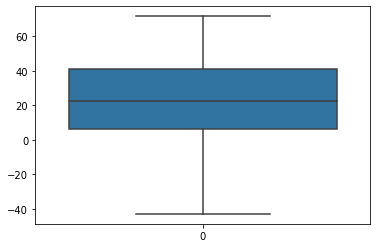

In [52]:
sns.boxplot(df.Lat) # No outliers


## Categorical to Quantitative 

In [53]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,211802.000000,211802.000000,2.133480e+05,213348.000000,2.133480e+05,2.133480e+05
mean,21.129600,23.033319,4.611305e+05,9378.234003,1.087812e+05,3.429710e+05
std,24.999931,76.420167,2.718286e+06,47662.981799,8.500244e+05,2.525315e+06
min,-42.882100,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.611100,-23.041800,2.660000e+02,2.000000,0.000000e+00,1.800000e+01
50%,22.820850,21.752000,5.432500e+03,75.000000,5.000000e+01,1.282000e+03
75%,41.204380,90.356300,1.008685e+05,1726.000000,5.287000e+03,2.718825e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


In [58]:
# Created dummies for all categorical columns
df_new = pd.get_dummies(df, drop_first = True)

In [62]:
df_new

,Lat,Long,Confirmed,Deaths,Recovered,Active,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,...,Date_2022-03-03,Date_2022-03-04,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,Lat_new_Below Ave,Lat_new_Above Ave,Lat_new_High
0,33.939110,67.709953,0,0,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,41.153300,20.168300,0,0,0,0,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,28.033900,1.659600,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,42.506300,1.521800,0,0,0,0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
4,-11.202700,17.873900,0,0,0,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214889,31.952200,35.233200,649971,5557,0,644414,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
214890,39.904200,116.407400,530,0,0,530,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
214891,15.552727,48.516388,11774,2135,0,9639,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
214892,-13.133897,27.849332,313613,3958,0,309655,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# Normalization

In [63]:
# Range converts to: 0 to 1
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [65]:
df_norm = norm_func(df_new['Lat'])

In [66]:
df_norm

0         0.670406
1         0.733364
2         0.618873
3         0.745171
4         0.276461
            ...   
214889    0.653067
214890    0.722463
214891    0.509951
214892    0.259608
214893    0.208281
Name: Lat, Length: 213348, dtype: float64

In [67]:
df_norm.describe()

count    211802.000000
mean          0.558620
std           0.218170
min           0.000000
25%           0.431919
50%           0.573379
75%           0.733809
max           1.000000
Name: Lat, dtype: float64